# **ASSIGNMENT 3 - BASICS OF DL**

I have continuously taken the help of various sites (special mention : stackoverflow) , whenever I got stuck at any stage .

## **Importing Libraries**

In [1]:
import numpy as np
import argparse
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import optim

## **Importing Datasets**

In [2]:

train=datasets.FashionMNIST(
   root="data",
   train=True,
     download=True,
    transform=transforms.ToTensor()

  )

test=datasets.FashionMNIST(
    root="data",
    train=False,
    
transform=transforms.ToTensor()

  )

training_data=torch.utils.data.DataLoader(train,batch_size=128,shuffle=True)
test_data=torch.utils.data.DataLoader(test,batch_size=128,shuffle=False)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## **Visualising datasets**

torch.Size([128, 1, 28, 28])
torch.Size([128])


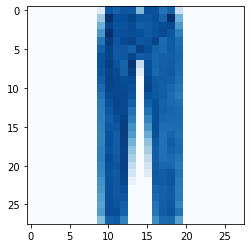

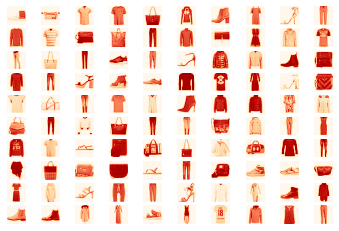

In [3]:
dataiter = iter(training_data)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)
plt.imshow(images[15].squeeze(), cmap='Blues');
figure = plt.figure()
num_of_images = 100
for i in range(1, num_of_images + 1):
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.imshow(images[i].numpy().squeeze(), cmap='OrRd')

###Checking the running device

In [9]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


##**Defining our Model**
Building a class named Model. Using ReLU activvation function in the model & adding 4 layers .

In [10]:
class Model(nn.Module):

  def __init__(self):

    super().__init__()
    self.step1 = nn.Linear(784, 256)      #Input features :28*28=784 --> Output features:256
    self.step2 = nn.Linear(256, 128)      #Input features :256 --> Output features:128
    self.step3 = nn.Linear(128, 64)       #Input features :128 --> Output features:64
    self.step4 = nn.Linear(64, 10)        #Input features :64 --> Output features:10 (Bcz total number of ouput labels is 10)
        
  def forward(self, x):
    x=self.step1(x)
    x=F.relu(x)             #Activation function after each layer
    x=self.step2(x)
    x=F.relu(x)
    x=self.step3(x)
    x=F.relu(x)
    x=self.step4(x)
    x=F.relu(x)
    x = F.log_softmax(x, dim=1)     #Applying softmax over the activated layer
    return x
model=Model()       
model.to(device)      #Shifting our model to the current device.


Model(
  (step1): Linear(in_features=784, out_features=256, bias=True)
  (step2): Linear(in_features=256, out_features=128, bias=True)
  (step3): Linear(in_features=128, out_features=64, bias=True)
  (step4): Linear(in_features=64, out_features=10, bias=True)
)

##**Testing & Training Loop**

In [11]:
Accuracy=[]             # List to store the accuracy over epochs
losses=[]               # List to store loss over epochs
cost=nn.CrossEntropyLoss()    # Using CrossEntropyLoss to calculate loss 
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)    #Using Adam optimizer
epochs = 25  #Running over 25 epochs
for e in range(epochs):
    loss1=0
    for images, labels in training_data:
        
        images = images.view(images.shape[0], -1)    #Flattening the input matrix into 1-d tensor
        images=images.to(device)        #Shifting to device
        labels=labels.to(device)
    
        # Training Loop
        
        output = model(images)        #Predicting the input according to model
        #output=output.to(device)
        loss = cost(output, labels)   #Calculating loss according to predicted output
        optimizer.zero_grad()         
        loss.backward()               #Optimizing 
        optimizer.step()
        
        loss1=loss.item()
        
    else:
        print("Loss on epoch",e+1,":",loss1)  #Printing Loss on each epoch
        losses.append(loss1)          #Adding loss of each epoch to the list

    #Calculating Accuracy over the test dataset

    correct=0
    total=0
    for img,lbl in test_data:
      img=img.to(device)
      lbl=lbl.to(device)
      img=img.view(img.shape[0],-1)
      pred1=model(img)
      _,pred=torch.max(pred1.data,1)     #Predicted Label 
      total+=lbl.size(0)
      correct+=(pred==lbl).sum().item()
    print("Accuracy on epoch",e+1," ",correct/total)  #Printing Accuracy on each epoch
    Accuracy.append(correct/total*100)                 #Adding accuracy to the list

Loss on epoch 1 : 0.6755732893943787
Accuracy on epoch 1   0.6914
Loss on epoch 2 : 0.9114149212837219
Accuracy on epoch 2   0.6964
Loss on epoch 3 : 0.6048408150672913
Accuracy on epoch 3   0.7885
Loss on epoch 4 : 0.5501075387001038
Accuracy on epoch 4   0.7937
Loss on epoch 5 : 0.6162876486778259
Accuracy on epoch 5   0.7946
Loss on epoch 6 : 0.678818941116333
Accuracy on epoch 6   0.7983
Loss on epoch 7 : 0.6692147850990295
Accuracy on epoch 7   0.7991
Loss on epoch 8 : 0.32053717970848083
Accuracy on epoch 8   0.7991
Loss on epoch 9 : 0.6088171601295471
Accuracy on epoch 9   0.804
Loss on epoch 10 : 0.6699827313423157
Accuracy on epoch 10   0.7918
Loss on epoch 11 : 0.4618898630142212
Accuracy on epoch 11   0.8079
Loss on epoch 12 : 0.27246978878974915
Accuracy on epoch 12   0.8043
Loss on epoch 13 : 0.5314223766326904
Accuracy on epoch 13   0.8016
Loss on epoch 14 : 0.5017155408859253
Accuracy on epoch 14   0.7978
Loss on epoch 15 : 0.5482032299041748
Accuracy on epoch 15   0.799

**The Accuracy obtained is 80.86%**

##**Accuracy Plot**

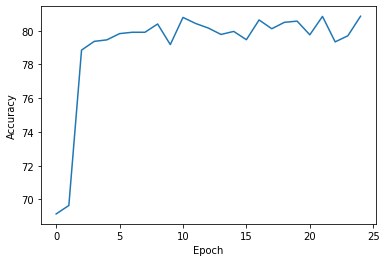

In [12]:
plt.plot(Accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

##**Loss Plot**

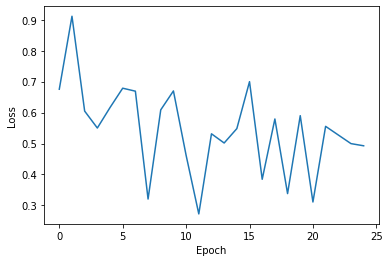

In [13]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

##**Some more Analysis**

We have used CrossEntropyLoss and Adam optimizer in the above training loop . 

Now , Let us use some other loss functions and optimizers and observe the result .

###**Using Negative Log likelihood loss(NLLLoss)**

In [19]:
Accuracy1=[]             # List to store the accuracy over epochs
losses1=[]               # List to store loss over epochs
cost=nn.NLLLoss()    # Using NLLLoss to calculate loss 
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)    #Using Adam optimizer
epochs = 25  #Running over 25 epochs
for e in range(epochs):
    loss1=0
    for images, labels in training_data:
        
        images = images.view(images.shape[0], -1)    #Flattening the input matrix into 1-d tensor
        images=images.to(device)        #Shifting to device
        labels=labels.to(device)
    
        # Training Loop
        
        output = model(images)        #Predicting the input according to model
        #output=output.to(device)
        loss = cost(output, labels)   #Calculating loss according to predicted output
        optimizer.zero_grad()         
        loss.backward()               #Optimizing 
        optimizer.step()
        
        loss1=loss.item()
        
    else:
        print("Loss on epoch",e+1,":",loss1)  #Printing Loss on each epoch
        losses1.append(loss1)          #Adding loss of each epoch to the list

    #Calculating Accuracy over the test dataset

    correct=0
    total=0
    for img,lbl in test_data:
      img=img.to(device)
      lbl=lbl.to(device)
      img=img.view(img.shape[0],-1)
      pred1=model(img)
      _,pred=torch.max(pred1.data,1)     #Predicted Label 
      total+=lbl.size(0)
      correct+=(pred==lbl).sum().item()
    print("Accuracy on epoch",e+1," ",correct/total)  #Printing Accuracy on each epoch
    Accuracy1.append(correct/total*100)                 #Adding accuracy to the list

Loss on epoch 1 : 0.5378650426864624
Accuracy on epoch 1   0.8022
Loss on epoch 2 : 0.40973106026649475
Accuracy on epoch 2   0.8092
Loss on epoch 3 : 0.3582354784011841
Accuracy on epoch 3   0.8061
Loss on epoch 4 : 0.639229953289032
Accuracy on epoch 4   0.7887
Loss on epoch 5 : 0.3450636565685272
Accuracy on epoch 5   0.7942
Loss on epoch 6 : 0.41538020968437195
Accuracy on epoch 6   0.7992
Loss on epoch 7 : 0.4030156135559082
Accuracy on epoch 7   0.8107
Loss on epoch 8 : 0.4320674240589142
Accuracy on epoch 8   0.7983
Loss on epoch 9 : 0.28934186697006226
Accuracy on epoch 9   0.8027
Loss on epoch 10 : 0.533223569393158
Accuracy on epoch 10   0.808
Loss on epoch 11 : 0.5543920397758484
Accuracy on epoch 11   0.8059
Loss on epoch 12 : 0.28052350878715515
Accuracy on epoch 12   0.8051
Loss on epoch 13 : 0.46470940113067627
Accuracy on epoch 13   0.8016
Accuracy on epoch 14   0.7987
Loss on epoch 15 : 0.40702638030052185
Accuracy on epoch 15   0.7938
Loss on epoch 16 : 0.517771005630

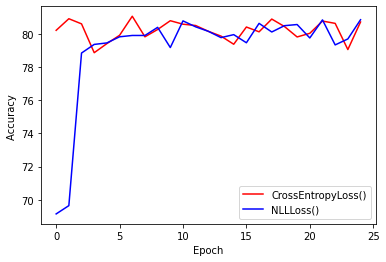

In [49]:
plt.plot(Accuracy1,color="r",label="CrossEntropyLoss()")
plt.plot(Accuracy,color="b",label="NLLLoss()")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy ")
plt.show()

So , we do not observe much difference between the accuracy between the two cases(CrossEntropy & Negative Log likelihood Loss functions) 

Let's intoduce new layers in our model and observe the change in accuracy.

We add two more layers in our model.

In [35]:
class Model2(nn.Module):

  def __init__(self):

    super().__init__()
    self.step1 = nn.Linear(784, 512)      #Input features :28*28=784 --> Output features:512
    self.step2 = nn.Linear(512,256)       #Input features :512 --> Output features:256
    self.step3=nn.Linear(256,128)         #Input features :256 --> Output features:128
    self.step4 = nn.Linear(128, 64)       #Input features :128 --> Output features:64
    self.step5 = nn.Linear(64, 32)        #Input features :64 --> Output features:32
    self.step6 = nn.Linear(32, 10)        #Input features :64 --> Output features:10 (Bcz total number of ouput labels is 10)
        
  def forward(self, x):
    x=self.step1(x)
    x=F.relu(x)             #Activation function after each layer
    x=self.step2(x)
    x=F.relu(x)
    x=self.step3(x)
    x=F.relu(x)
    x=self.step4(x)
    x=F.relu(x)
    x=self.step5(x)
    x=F.relu(x)
    x=self.step6(x)
    x=F.relu(x)
    x = F.log_softmax(x, dim=1)     #Applying softmax over the activated layer
    return x
model2=Model2()       
model2.to(device)      #Shifting our model to the current device.


Model2(
  (step1): Linear(in_features=784, out_features=512, bias=True)
  (step2): Linear(in_features=512, out_features=256, bias=True)
  (step3): Linear(in_features=256, out_features=128, bias=True)
  (step4): Linear(in_features=128, out_features=64, bias=True)
  (step5): Linear(in_features=64, out_features=32, bias=True)
  (step6): Linear(in_features=32, out_features=10, bias=True)
)

In [44]:
Accuracy3=[]             # List to store the accuracy over epochs
losses3=[]               # List to store loss over epochs
cost1=nn.CrossEntropyLoss()    # Using CrossEntropyLoss to calculate loss 
optimizer1=torch.optim.Adam(model.parameters(),lr=0.01)    #Using Adam optimizer
epochs = 25  #Running over 25 epochs
for e in range(epochs):
    loss1=0
    for images, labels in training_data:
        
        images = images.view(images.shape[0], -1)    #Flattening the input matrix into 1-d tensor
        images=images.to(device)        #Shifting to device
        labels=labels.to(device)
    
        # Training Loop
        
        output = model2(images)        #Predicting the input according to model
        #output=output.to(device)
        loss = cost1(output, labels)   #Calculating loss according to predicted output
        optimizer1.zero_grad()         
        loss.backward()               #Optimizing 
        optimizer1.step()
        
        loss1=loss.item()
        
    else:
        print("Loss on epoch",e+1,":",loss1)  #Printing Loss on each epoch
        losses3.append(loss1)                 #Adding loss of each epoch to the list

    #Calculating Accuracy over the test dataset

    correct=0
    total=0
    for img,lbl in test_data:
      img=img.to(device)
      lbl=lbl.to(device)
      img=img.view(img.shape[0],-1)
      pred1=model2(img)
      _,pred=torch.max(pred1.data,1)                    #Predicted Label 
      total+=lbl.size(0)
      correct+=(pred==lbl).sum().item()
    print("Accuracy on epoch",e+1," ",correct/total)    #Printing Accuracy on each epoch
    Accuracy3.append(correct/total*100)                 #Adding accuracy to the list

Loss on epoch 1 : 2.307703733444214
Accuracy on epoch 1   0.1
Loss on epoch 2 : 2.3044674396514893
Accuracy on epoch 2   0.1
Loss on epoch 3 : 2.2927908897399902
Accuracy on epoch 3   0.1
Loss on epoch 4 : 2.2973811626434326
Accuracy on epoch 4   0.1
Loss on epoch 5 : 2.3068978786468506
Accuracy on epoch 5   0.1
Loss on epoch 6 : 2.301058053970337
Accuracy on epoch 6   0.1
Loss on epoch 7 : 2.299079656600952
Accuracy on epoch 7   0.1
Loss on epoch 8 : 2.304283857345581
Accuracy on epoch 8   0.1
Loss on epoch 9 : 2.302225112915039
Accuracy on epoch 9   0.1
Loss on epoch 10 : 2.3075928688049316
Accuracy on epoch 10   0.1
Loss on epoch 11 : 2.304816484451294
Accuracy on epoch 11   0.1
Loss on epoch 12 : 2.3020823001861572
Accuracy on epoch 12   0.1
Loss on epoch 13 : 2.29866623878479
Accuracy on epoch 13   0.1
Loss on epoch 14 : 2.291781187057495
Accuracy on epoch 14   0.1
Loss on epoch 15 : 2.301050901412964
Accuracy on epoch 15   0.1
Accuracy on epoch 16   0.1
Loss on epoch 17 : 2.30163

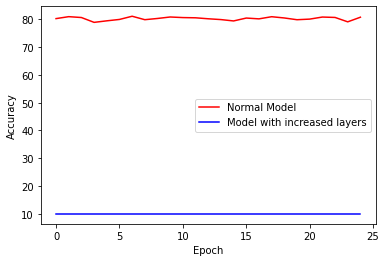

In [48]:
plt.plot(Accuracy1,color="r",label="Normal Model")
plt.plot(Accuracy3,color="b",label="Model with increased layers")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

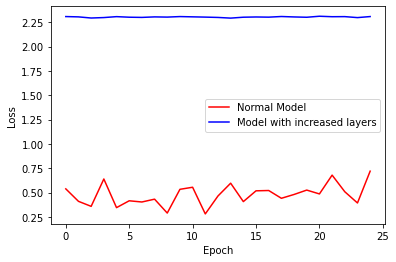

In [47]:
plt.plot(losses1,color="r",label="Normal Model")
plt.plot(losses3,color="b",label="Model with increased layers")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

We obtain an accuracy of **10%** , which is really very very low .
Though at every epoch accuracy is same , I couldn't able to find out why .

Even in the loss plot , the difference is uncomparable!

Scientifically , researchers have observed that the deeper the network , our model would learn more features , hence it should produce better accuracy and the loss function should be minimised .

But , researches showed that using deeper networks/models led to opposite results as it was expected . A new problem arise which was termed as **vanishing gradients** , i.e. using deeper networks the gradients diminish gradually(become very small) . To overcome such issues , researchers came up with a CNN named **Resnet** , which use the concept of **skip connections** to overcome this problem .

Resnet research paper: https://arxiv.org/abs/1512.03385 .
